In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
%matplotlib inline

First Step: Loading the training data

In [4]:
Data = pd.read_csv("train.csv")

In [5]:
print(Data.shape)
Data.head()


(60000, 24)


,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,...,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,...,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1


C:\Users\Acer\AppData\Local\Temp/ipykernel_21372/1190304608.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Data.corr()


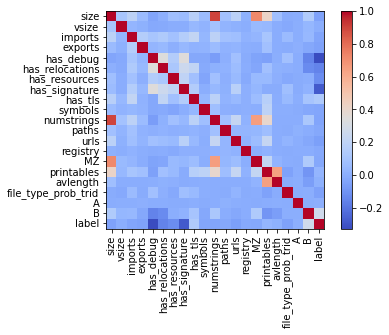

In [6]:
corr_matrix = Data.corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

NOTE: from this graph we see there are correlations betwen both size and MZ (check that) and size with nmumstirngs and printables

based on ChatGPT: Multiple MZ strings in an EXE file can also indicate that the file has been infected with malware or is otherwise malicious. Some malware authors may add multiple MZ strings to an EXE file in an attempt to evade detection by antivirus software. In this case, the additional MZ strings may contain malicious code or data that is executed when the file is run.


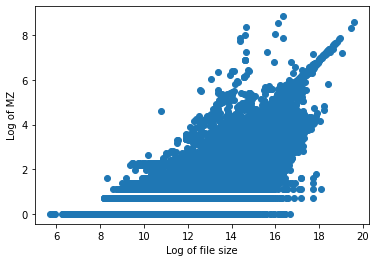

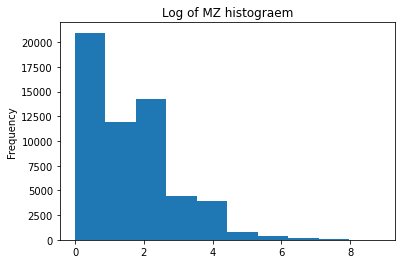

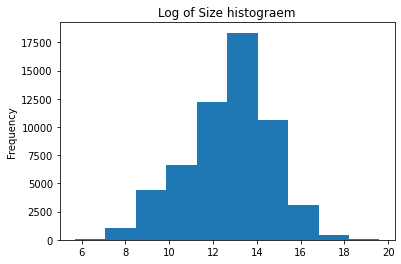

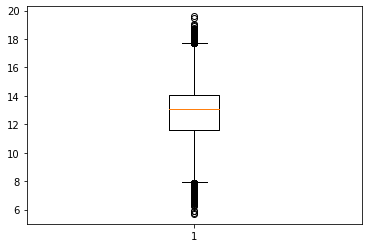

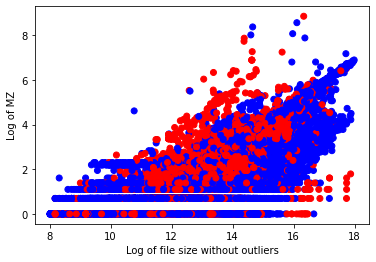

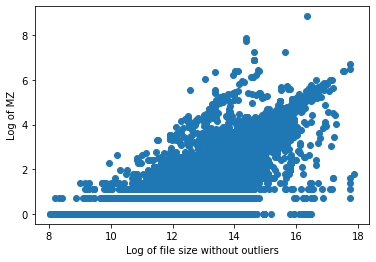

In [44]:
mz = Data[Data["MZ"] > 0]["MZ"]
size = Data[Data["MZ"] > 0]["size"]

logSize = np.log(size)
logMZ = np.log(mz)
plt.scatter(logSize, logMZ)
plt.xlabel("Log of file size")
plt.ylabel('Log of MZ')
plt.show()
plt.title("Log of MZ histograem")
logMZ.plot.hist()
plt.show()
plt.title("Log of Size histograem")
logSize.plot.hist()
plt.show()
plt.boxplot(logSize)
plt.show()

logSize_no_out = logSize[(logSize < 18) & (logSize > 8)]
MZ_no_out = Data[(Data["MZ"] > 0) & ((logSize < 18) & (logSize > 8))]["MZ"]
labels = Data[(Data["MZ"] > 0) & ((logSize < 18) & (logSize > 8))]['label']
label_colors = {1: 'red', 0: 'blue'}
plt.scatter(logSize_no_out, np.log(MZ_no_out), c=[label_colors[label] for label in labels])
plt.xlabel("Log of file size without outliers")
plt.ylabel('Log of MZ')
plt.show()
logSize_mal = logSize_no_out[(labels==1)]
mz_mal = MZ_no_out[(labels==1)]
plt.scatter(logSize_mal, np.log(mz_mal))
plt.xlabel("Log of file size without outliers")
plt.ylabel('Log of MZ')
plt.show()

C:\Users\Acer\AppData\Local\Temp/ipykernel_21372/3986740659.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = label_1_data.corr()


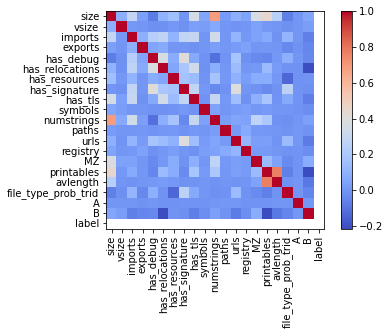

In [49]:
#corr matrix for only lable == 1 (malicious files)
label_1_data = Data[Data['label'] == 1]
corr_matrix = label_1_data.corr()

plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()
